# Question 4 : Représentation de la fonctionnelle J

### Importation des modules nécessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

### La matrice A

In [139]:
n = 10 
A = 2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
A

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

### Le vecteur b

In [140]:
b = np.ones(n)
b

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

###  La fonctionnelle J

In [141]:
#u1 et u2 représente les composantes de u pour n=2

x = np.linspace(-10, 10, 50)
u1, u2 = np.meshgrid(x, x)
J = u1**2 + u2**2 - u1*u2 - (u1 + u2) #Expression de J pour n=2 après calcul

### Représentation graphique

Text(0.5, 0, 'J')

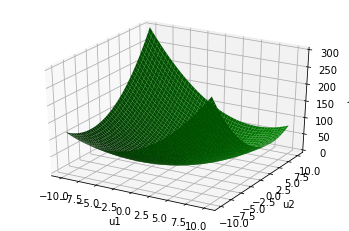

In [142]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u1, u2, J, color='g')

ax.set_xlabel('u1')
ax.set_ylabel('u2')
ax.set_zlabel('J')

# Question 5 :

### Recherche de la plus petite valeur propre de A

In [143]:
for n in [2, 5, 10, 50, 100]: #Quelques exemples
    A = 2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    print(min(np.linalg.eigvals(A)))

1.0
0.2679491924311224
0.08101405277100472
0.0037933425259121774
0.0009674354160258218


### Interprétation

On remarque donc que la plus petite valeur propre est toujours strictement positive et donc toutes les valeur propres de A sont strictement positives. D'où A est symétrique définie positive.

### Solution pour le cas n = 2

In [144]:
n = 2
A = 2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
b = np.ones(n)
u = np.linalg.solve(A, b)
print('La solution est u =', list(u))

La solution est u = [1.0, 1.0]


# Question 6 : Méthodes du gradient

## Méthode du gradient à pas fixe

In [145]:
def grad_pas_fixe (alpha, u0, Tol=1e-6, Max_iter=1000000):
    
    t0 = time.time()
    k = 0
    err = Tol
    u_k = u0
    x = [u_k[0]]
    y = [u_k[1]]
    
    while k <= Max_iter and err>=Tol : 
        d = -np.dot(A,u_k) + b
        u_i = u_k
        u_k = u_k + alpha * d
        err = np.linalg.norm(u_k - u_i)
        x.append(u_k[0])
        y.append(u_k[1])
        k += 1
    
    tf = time.time()
    duree = tf - t0
    
    return u_k, x, y, k, duree

## Méthode de la section dorée

In [146]:
def sec_dor (f, a, b, Tol=0.01, Max_iter=1000):
    
    phi = (1 + np.sqrt(5)) / 2
    c = a + (b - a) / (phi ** 2)
    d = a + (b - a) / phi
    k=0
    while abs(b - a) >= Tol and  Max_iter > k:
        if f(c) < f(d):
            b = d
        elif f(c) == f(d):
            a = c
            b = d
        else:
            a = c
        
        c = a + (b - a) / (phi ** 2)
        d = a + (b - a) / phi

    return (b + a) / 2

## Méthode du gradient à pas optimal

### Avec la méthode de la section dorée

In [147]:
def grad_pas_optimal (u0, Tol=0.01, Max_iter=1000000):
    
    t0 = time.time()
    k = 0
    u_k = u0
    rho_A = max(np.linalg.eigvals(A))     #Rayon spectral de A
    err = Tol
    x = [u_k[0]]
    y = [u_k[1]]
    
    while err >= Tol and k <= Max_iter :
        
        d = -np.dot(A,u_k) + b
        u_i = u_k
        f = lambda alpha : 0.5 * np.dot(np.dot(A, u_k + alpha * d), u_k + alpha * d) - np.dot(b, u_k + alpha * d)
        alpha = sec_dor(f, 0, 2 / rho_A)
        u_k = u_k + alpha * d
        err = np.linalg.norm(u_k - u_i)
        
        x.append(u_k[0])
        y.append(u_k[1])
        k += 1
    
    tf = time.time()
    duree = tf - t0
    
    return u_k, x, y, k, duree

### Avec la méthode du cours

In [148]:
def grad_pas_optimal2 (u0, Tol=0.01, Max_iter=1000000):
    
    t0 = time.time()
    k = 0
    u_k = u0
    rho_A = max(np.linalg.eigvals(A))     #Rayon spectral de A
    err = Tol
    x = [u_k[0]]
    y = [u_k[1]]
    
    while err >= Tol and k <= Max_iter :
        
        d = -np.dot(A,u_k) + b
        u_i = u_k
        alpha = np.dot(d, d) / np.dot(np.dot(A, d), d)
        u_k = u_k + alpha * d
        err = np.linalg.norm(u_k - u_i)
        
        x.append(u_k[0])
        y.append(u_k[1])
        k += 1
    
    tf = time.time()
    duree = tf - t0
    
    return u_k, x, y, k, duree

## Méthode du gradient conjugué

In [149]:
def grad_conjugue (u0, Tol=0.01, Max_iter=1000):
    
    t0 = time.time()
    u_k = u0
    k = 0
    err = Tol
    x = [u_k[0]]
    y = [u_k[1]]
    
    r_k = np.dot(A, u_k) - b
    d_k = -r_k
    
    while err >= Tol and k <= Max_iter :
        
        alpha = - np.dot(r_k, d_k) / np.dot(np.dot(A, d_k), d_k)
        u_i = u_k
        u_k = u_k + alpha * d_k
        r_i = r_k
        r_k = np.dot(A, u_k) - b
        beta = np.linalg.norm(r_k) ** 2 / np.linalg.norm(r_i) ** 2
        d_k = - r_k + beta * d_k
        err = np.linalg.norm(u_k - u_i)
        
        x.append(u_k[0])
        y.append(u_k[1])
        k += 1
        
    tf = time.time()
    duree = tf - t0
    
    return u_k, x, y, k, duree

## Test des méthodes pour n = 2

### Initialisation

In [150]:
n=2
A = 2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
b = np.ones(n)

x = np.linspace(-10, 10, 50)
u1, u2 = np.meshgrid(x, x)
J = u1**2 + u2**2 - u1*u2 - (u1 + u2)

u0 = np.array([7.0, 5.0])
alpha = 0.1
Tol = 1e-6

### Test de la méthode du gradient à pas fixe

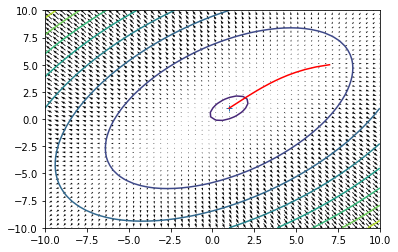

In [151]:
u_f, x_f, y_f, k_f, d_f = grad_pas_fixe (alpha, u0, Tol)

fig = plt.figure()
ax = fig.add_subplot()
ax.contour(u1, u2, J)
v, u = np.gradient(J, 0.5, 0.5)
ax.quiver(u1, u2, u, v)
plt.plot(1, 1, '+')

plt.plot(x_f, y_f, 'r')

### Test de la méthode du gradient à pas optimal

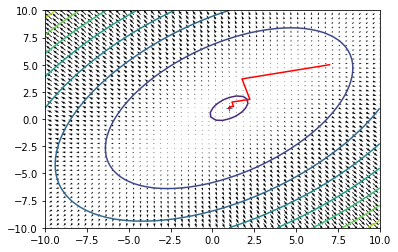

In [152]:
u_o, x_o, y_o, k_o, d_o = grad_pas_optimal (u0, Tol)

fig = plt.figure()
ax = fig.add_subplot()
ax.contour(u1, u2, J)
v, u = np.gradient(J, 0.5, 0.5)
ax.quiver(u1, u2, u, v)
plt.plot(1, 1, '+')

plt.plot(x_o, y_o, 'r')

### Test de la méthode du gradient conjugué

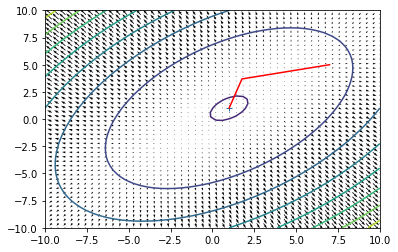

In [153]:
u_c, x_c, y_c, k_c, d_c = grad_conjugue (u0, Tol)

fig = plt.figure()
ax = fig.add_subplot()
ax.contour(u1, u2, J)
v, u = np.gradient(J, 0.5, 0.5)
ax.quiver(u1, u2, u, v)
plt.plot(1, 1, '+')

plt.plot(x_c, y_c, 'r')

## Pour autres valeurs de n

### Test de la convergence

- Gradient à pas fixe

In [154]:
k_pas_fixe, d_pas_fixe = [], [] #Pour la comparaison plus tard

for n in [10, 20, 30, 50, 100]: #plus de valeurs que l'énoncé pour être plus précis
    A = 2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    b = np.ones(n)
    u0 = np.zeros(n)+2
    u_f, x_f, y_f, k_f, d_f = grad_pas_fixe (alpha, u0, Tol)
    u = np.linalg.solve(A, b) #Solution exacte
    print("Pour ", n, "dimensions, l'erreur est :", np.linalg.norm(u - u_f))
    
    k_pas_fixe.append(k_f)
    d_pas_fixe.append(d_f)

Pour  10 dimensions, l'erreur est : 0.00012169083117847735
Pour  20 dimensions, l'erreur est : 0.00044625327573055425
Pour  30 dimensions, l'erreur est : 0.0009725588225981735
Pour  50 dimensions, l'erreur est : 0.0026346589378590515
Pour  100 dimensions, l'erreur est : 0.01033539348675598


- Gradient à pas optimal

In [155]:
k_pas_optimal, d_pas_optimal = [], [] #Pour la comparaison plus tard

for n in [10, 20, 30, 50, 100]:
    A = 2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    b = np.ones(n)
    u0 = np.zeros(n)
    u_o, x_o, y_o, k_o, d_o = grad_pas_optimal (u0, Tol)
    u = np.linalg.solve(A, b) #Solution exacte
    print("Pour ", n, "dimensions, l'erreur est :", np.linalg.norm(u - u_o))
    
    k_pas_optimal.append(k_o)
    d_pas_optimal.append(d_o)

Pour  10 dimensions, l'erreur est : 2.2538315086576625e-05
Pour  20 dimensions, l'erreur est : 9.78866883454664e-05
Pour  30 dimensions, l'erreur est : 0.0002670524228015188
Pour  50 dimensions, l'erreur est : 0.0016847949207807124
Pour  100 dimensions, l'erreur est : 0.020398177301600963


- Gradient conjugué

In [156]:
k_conjugue, d_conjugue = [], [] #Pour la comparaison plus tard

for n in [10, 20, 30, 50, 100]:
    A = 2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    b = np.ones(n)
    u0 = np.zeros(n)+2
    u_c, x_c, y_c, k_c, d_c = grad_conjugue (u0, Tol)
    u = np.linalg.solve(A, b) #Solution exacte
    print("Pour ", n, "dimensions, l'erreur est :", np.linalg.norm(u - u_c))
    
    k_conjugue.append(k_c)
    d_conjugue.append(d_c)

Pour  10 dimensions, l'erreur est : 6.217248937900877e-15
Pour  20 dimensions, l'erreur est : 5.4606723228329904e-14
Pour  30 dimensions, l'erreur est : 1.1435668802841422e-12
Pour  50 dimensions, l'erreur est : 1.1896070641714441e-11
Pour  100 dimensions, l'erreur est : 6.005090757367539e-11


On remarque que les erreurs sont très faibles et donc les trois méthodes convergent vers la solution.

### Comparaison de la rapidité de convergence et le temps de calcul

Text(0, 0.5, "Durée d'exécution (en s)")

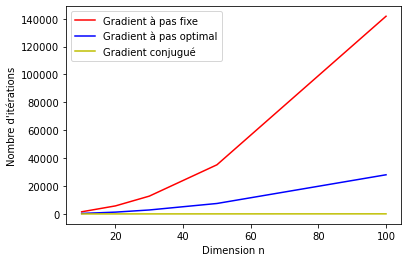

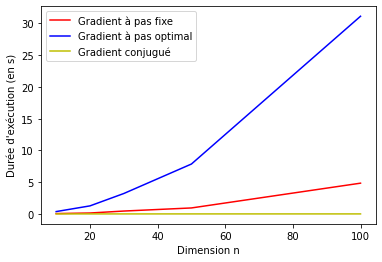

In [166]:
n = [10, 20, 30, 50, 100]
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(n, k_pas_fixe, 'r')
plt.plot(n, k_pas_optimal, 'b')
plt.plot(n, k_conjugue, 'y')
plt.legend(['Gradient à pas fixe','Gradient à pas optimal','Gradient conjugué'])
plt.xlabel("Dimension n")
plt.ylabel("Nombre d'itérations")

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(n, d_pas_fixe, 'r')
plt.plot(n, d_pas_optimal, 'b')
plt.plot(n, d_conjugue, 'y')
plt.legend(['Gradient à pas fixe','Gradient à pas optimal','Gradient conjugué'])
plt.xlabel("Dimension n")
plt.ylabel("Durée d'exécution (en s)")

### Comparaison entre la méthode de la section dorée et la méthode du cours

In [158]:
k_pas_optimal2, d_pas_optimal2 = [], [] #Pour la comparaison plus tard

for n in [10, 20, 30, 50, 100]:
    A = 2 * np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    b = np.ones(n)
    u0 = np.zeros(n)+2
    u_o2, x_o2, y_o2, k_o2, d_o2 = grad_pas_optimal2 (u0, Tol)
    u = np.linalg.solve(A, b) #Solution exacte
    print("Pour ", n, "dimensions, l'erreur est :", np.linalg.norm(u - u_o2))
    
    k_pas_optimal2.append(k_o2)
    d_pas_optimal2.append(d_o2)

Pour  10 dimensions, l'erreur est : 1.649981503427125e-05
Pour  20 dimensions, l'erreur est : 6.609967959418295e-05
Pour  30 dimensions, l'erreur est : 0.00014675115867629645
Pour  50 dimensions, l'erreur est : 0.00039805220405129065
Pour  100 dimensions, l'erreur est : 0.0015111913333906107


Text(0, 0.5, "Durée d'exécution (en s)")

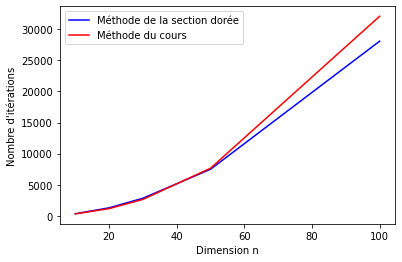

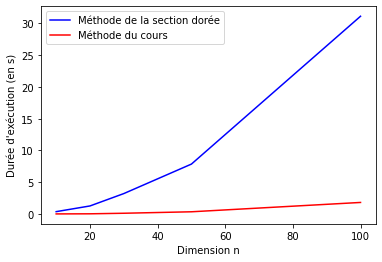

In [167]:
n = [10, 20, 30, 50, 100]
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(n, k_pas_optimal, 'b')
plt.plot(n, k_pas_optimal2, 'r')
plt.legend(['Méthode de la section dorée','Méthode du cours'])
plt.xlabel("Dimension n")
plt.ylabel("Nombre d'itérations")

n = [10, 20, 30, 50, 100]
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(n, d_pas_optimal, 'b')
plt.plot(n, d_pas_optimal2, 'r')
plt.legend(['Méthode de la section dorée','Méthode du cours'])
plt.xlabel("Dimension n")
plt.ylabel("Durée d'exécution (en s)")